# NN

* We will cover the essentials of NN during the lecture
* Those absent, try eg. [this tutorial](https://www.cs.toronto.edu/~jlucas/teaching/csc411/lectures/tut5_handout.pdf)
* For everyone interested, [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/) is some reading about the loss functions
* And [here](https://github.com/Jaewan-Yun/optimizer-visualization) is the visualization of different optimizers I showed
* We also walked through several optimization techniques, if you missed the lecture on that, I suggest you watch these: [Momentum](https://www.youtube.com/watch?v=N18Km9YIIug) [RMSProp](https://www.youtube.com/watch?v=XhZahXzEuNo) and [Adam](https://www.youtube.com/watch?v=JXQT_vxqwIs). These videos are by Hinton and Ng, who are trustable sources. 

# Bag-of-words document classification

* BoW is the simplest way to do classification: Feature vector goes in, decision falls out.

* Feature vector: a vector with as many dimensions as we have unique features, and a non-zero value set for every feature present in our example
* Binary features: 1/0

In the following we work with the IMDB data, have a look on [how to read it in](read_imdb.ipynb). Here we just read the ready data in.

# IMDB data

* Movie review sentiment positive/negative
* Some 25,000 examples, 50:50 split
* Current state-of-the-art is about 95% accuracy


In [1]:
!wget https://raw.githubusercontent.com/TurkuNLP/Deep_Learning_in_LangTech_course/master/data/imdb_train.json

--2020-03-03 09:23:15--  https://raw.githubusercontent.com/TurkuNLP/Deep_Learning_in_LangTech_course/master/data/imdb_train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.84.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33944099 (32M) [text/plain]
Saving to: ‘imdb_train.json.3’

imdb_train.json.3   100%[===================>]  32,37M  15,0MB/s    in 2,2s    

2020-03-03 09:23:19 (15,0 MB/s) - ‘imdb_train.json.3’ saved [33944099/33944099]



In [2]:
import json
import random
with open("imdb_train.json") as f:
    data=json.load(f)
random.shuffle(data) #play it safe!
print(data[0]) #Every item is a dictionary with `text` and `class` keys, here's the first one:

{'class': 'neg', 'text': 'About 15 minutes in, my wife was already wanting to leave. Not so much because of the material, but the lack thereof. They decided to fill in the blanks where the funny stuff should\'ve been with as much language and absolutely vulgar talk as they could. When this would let up (very rare), we\'d sit back and watch (not laughing, mind you) and wait for the next gross-out or offensive remark(s). After about 35 minutes, we both got up and left. Everything we\'d read said how great this was. The trailer looked good and Roger Ebert actually called it \\intelligent\\" and said it wasn\'t a crude sex comedy. Did he go to the right movie? Along with Be Cool, it\'s the only other movie I\'ve ever walked out on...and I have no regrets. I\'m sick of trying to go see comedies in America."'}


To learn on this data, we will need a few steps:

* Build a data matrix with dimensionality (number of examples, number of possible features), and a value for each feature, 0/1 for binary features
* Build a class label matrix (number of examples, number of classes) with the correct labels for the examples, setting 1 for the correct class, and 0 for others

It is quite useless to do all this ourselves, so we will use ready-made classes and functions mostly from scikit

In [3]:
# We need to gather the texts, into a list
texts=[one_example["text"] for one_example in data]
labels=[one_example["class"] for one_example in data]
print(texts[:2])
print(labels[:2])

['About 15 minutes in, my wife was already wanting to leave. Not so much because of the material, but the lack thereof. They decided to fill in the blanks where the funny stuff should\'ve been with as much language and absolutely vulgar talk as they could. When this would let up (very rare), we\'d sit back and watch (not laughing, mind you) and wait for the next gross-out or offensive remark(s). After about 35 minutes, we both got up and left. Everything we\'d read said how great this was. The trailer looked good and Roger Ebert actually called it \\intelligent\\" and said it wasn\'t a crude sex comedy. Did he go to the right movie? Along with Be Cool, it\'s the only other movie I\'ve ever walked out on...and I have no regrets. I\'m sick of trying to go see comedies in America."', 'i chose to see the this film on the day it opened nationally in france, as a personal way for myself to reflect on what had happened a year previous; the collection works as intended: it provokes a whirlwind

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix=vectorizer.fit_transform(texts)
print("shape=",feature_matrix.shape)


shape= (25000, 74849)


Now we have the feature matrix done! Next thing we need is the class labels to be predicted in one-hot encoding. This means:

* one row for every example
* one column for every possible class label
* exactly one column has 1 for every example, corresponding to the desired class

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder() #Turns class labels into integers
class_numbers=label_encoder.fit_transform(labels)

print("class_numbers shape=",class_numbers.shape)
print("class labels",label_encoder.classes_) #this will let us translate back from indices to labels

class_numbers shape= (25000,)
class labels ['neg' 'pos']


* The data is ready, we need to build the network now
* Input
* Hidden Dense layer with some kind of non-linearity, and a suitable number of nodes
* Output Dense layer with the softmax activation (normalizes output to distribution) and as many nodes as there are classes

In [6]:
import keras
from keras.models import Model
from keras.layers import Input, Dense

example_count,feature_count=feature_matrix.shape
class_count=len(label_encoder.classes_)

inp=Input(shape=(feature_count,))
hidden=Dense(200,activation="tanh")(inp)
outp=Dense(class_count,activation="softmax")(hidden)
model=Model(inputs=[inp], outputs=[outp])

Using TensorFlow backend.
/home/ginter/venv-jlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ginter/venv-jlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ginter/venv-jlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ginter/venv-jlab/lib/python3.7/site-packages/tenso

...it's **this** simple...!

Once the model is constructed it needs to be compiled, for that we need to know:
* which optimizer we want to use (sgd is fine to begin with)
* what is the loss (categorial_crossentropy for multiclass of the kind we have is the right choice)
* which metrics to measure, accuracy is an okay choice

In [7]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

A compiled model can be fitted on data:

In [8]:
hist=model.fit(feature_matrix,class_numbers,batch_size=100,verbose=1,epochs=5,validation_split=0.1)


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 74s 3ms/step - loss: 0.3191 - accuracy: 0.8652 - val_loss: 0.2971 - val_accuracy: 0.8824
Epoch 2/5
22500/22500 [==============================] - 81s 4ms/step - loss: 0.0966 - accuracy: 0.9668 - val_loss: 0.3840 - val_accuracy: 0.8804
Epoch 3/5
22500/22500 [==============================] - 74s 3ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.5524 - val_accuracy: 0.8760
Epoch 4/5
22500/22500 [==============================] - 76s 3ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.6906 - val_accuracy: 0.8688
Epoch 5/5
22500/22500 [==============================] - 85s 4ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.9025 - val_accuracy: 0.8632


In [9]:
print(hist.history["val_accuracy"])

[0.8823999762535095, 0.8804000020027161, 0.8759999871253967, 0.8687999844551086, 0.8632000088691711]


* We ran for 10 epochs of training
* Made it to a decent accuracy on the validation data

* But we do not have the model saved, so let's fix that and get the whole thing done
* What constitutes a model (ie what we need to run the model on new data)
  - The feature dictionary in the vectorizer
  - The list of classes in their correct order
  - The structure of the network
  - The weights the network learned

* Do all these things, and run again. This time we also increase the number of epochs to 100, see what happens.

In [10]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle
import os

def save_model(file_name,model,label_encoder,vectorizer):
    """Saves model structure and vocabularies"""
    model_json = model.to_json()
    with open(file_name+".model.json", "w") as f:
        print(model_json,file=f)
    with open(file_name+".encoders.pickle","wb") as f:
        pickle.dump((label_encoder,vectorizer),f)
        
example_count,feature_count=feature_matrix.shape
class_count=len(label_encoder.classes_)

inp=Input(shape=(feature_count,))
hidden=Dense(200,activation="tanh")(inp)
outp=Dense(class_count,activation="softmax")(hidden)
model=Model(inputs=[inp], outputs=[outp])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

# Save model and vocabularies, can be done before training
save_model("models/imdb_bow",model,label_encoder,vectorizer)
# Callback function to save weights during training, if validation loss goes down
save_cb=ModelCheckpoint(filepath="models/imdb_bow.weights.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# Callback to stop training when no improvement
stop_cb=EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

hist=model.fit(feature_matrix,class_numbers,batch_size=100,verbose=1,epochs=100,validation_split=0.1,callbacks=[save_cb,stop_cb])


Train on 22500 samples, validate on 2500 samples
Epoch 1/100
22500/22500 [==============================] - 93s 4ms/step - loss: 0.3162 - accuracy: 0.8706 - val_loss: 0.2945 - val_accuracy: 0.8884

Epoch 00001: val_loss improved from inf to 0.29446, saving model to models/imdb_bow.weights.h5
Epoch 2/100
22500/22500 [==============================] - 86s 4ms/step - loss: 0.0961 - accuracy: 0.9660 - val_loss: 0.3727 - val_accuracy: 0.8744

Epoch 00002: val_loss did not improve from 0.29446
Epoch 3/100
22500/22500 [==============================] - 79s 4ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.6194 - val_accuracy: 0.8596

Epoch 00003: val_loss did not improve from 0.29446
Restoring model weights from the end of the best epoch
Epoch 00003: early stopping


In [11]:
import numpy
from sklearn.metrics import classification_report, confusion_matrix

#Validation data used during training:
val_instances,val_labels,_=hist.validation_data

print("Network output=",model.predict(val_instances))
predictions=numpy.argmax(model.predict(val_instances),axis=1)
print("Maximum class for each example=",predictions)
conf_matrix=confusion_matrix(list(val_labels),list(predictions))
print("Confusion matrix=\n",conf_matrix)
gold_labels=label_encoder.inverse_transform(list(val_labels))
predicted_labels=label_encoder.inverse_transform(list(predictions))
print(classification_report(gold_labels,predicted_labels))


Network output= [[9.9930477e-01 6.9525826e-04]
 [7.9488242e-01 2.0511755e-01]
 [4.2360965e-02 9.5763910e-01]
 ...
 [6.8167770e-01 3.1832227e-01]
 [2.9446951e-01 7.0553046e-01]
 [1.4119088e-02 9.8588085e-01]]
Maximum class for each example= [0 0 1 ... 0 1 1]
Confusion matrix=
 [[1088  183]
 [  96 1133]]
              precision    recall  f1-score   support

         neg       0.92      0.86      0.89      1271
         pos       0.86      0.92      0.89      1229

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



/home/ginter/venv-jlab/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Learning progress

* The history object we get lets us inspect the accuracy during training
* Remarks:
  - Accuracy on training data keeps going up
  - Accuracy on validation (test) data flattens out after a but over 10 epochs, we are learning very little past that point
  - What we see is the network keeps overfitting on the training data to the end

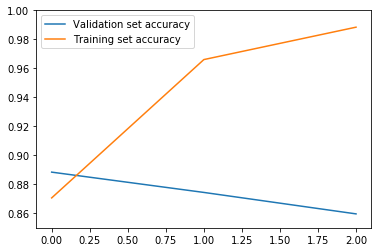

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.ylim(0.85,1.0)
plt.plot(hist.history["val_accuracy"],label="Validation set accuracy")
plt.plot(hist.history["accuracy"],label="Training set accuracy")
plt.legend()
plt.show()

# Summary

* We put together a program to train a neural network classifier for sentiment detector
* We learned the necessary code/techniques to save models, and feed the training with data in just the right format
* We observed the training across epochs
* We saw how the classifier can be applied to various text classification problems
* The IMDB sentiment classifier ended up at nearly 90% accuracy, the state of the art is about 95%, we got surprisingly far in few lines of code
